In [1]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

from persim import plot_diagrams
from ripser import ripser, lower_star_img
import os
import torch as tc
import torchvision as tv
import cv2 
from skimage import io
import preprocessing_project as pre
import skimage.morphology as morphology
import scipy.ndimage as ndimage
import numpy as np
from skimage.morphology import square
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import math



(473, 412)
(255, 255)
(450, 382)
(255, 254)


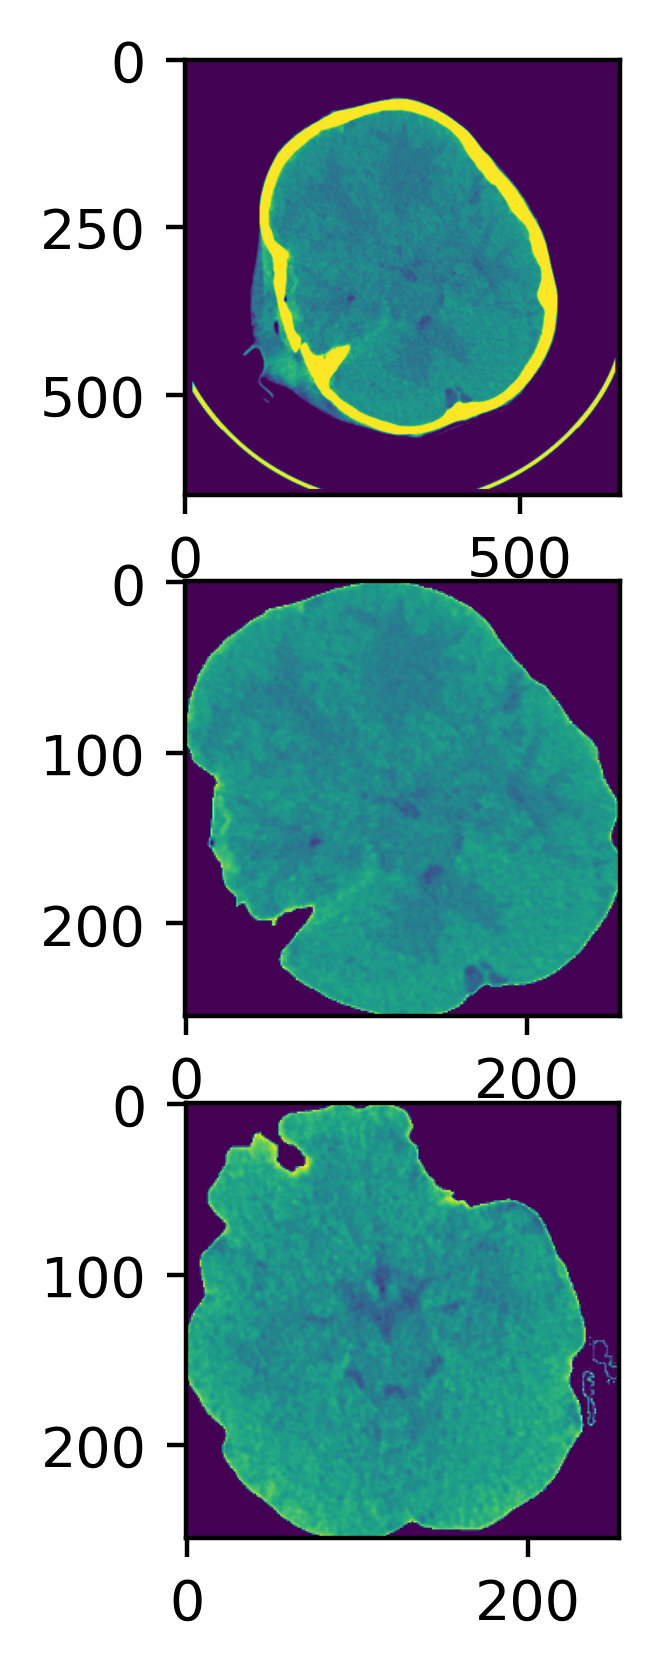

In [2]:
path_homm = r'../../Desktop/ProjektTOM/CT_better/test/Homm/51_15.jpg'
path_no_homm = r'../../Desktop/ProjektTOM/CT_better/training/No_homm/100_13.jpg'

image_homm = io.imread(path_homm)
image_no_homm = io.imread(path_no_homm)
plt.figure(dpi = 400)
ax = plt.subplot(3, 1, 1)
ax.imshow(image_homm)



image_homm = pre.real_noise_cancel(image_homm)
image_homm = pre.flood_(image_homm)
image_homm = pre.delete_skull(image_homm)
image_homm = pre.nice(image_homm)
image_homm = pre.crop(image_homm)
image_homm = pre.normalise(image_homm)
image_homm = cv2.resize(image_homm, (256, 256))
image_homm = pre.crop(image_homm)

image_no_homm = pre.real_noise_cancel(image_no_homm)
image_no_homm = pre.flood_(image_no_homm)
image_no_homm = pre.delete_skull(image_no_homm)
image_no_homm = pre.nice(image_no_homm)
image_no_homm = pre.crop(image_no_homm)
image_no_homm = pre.normalise(image_no_homm)
image_no_homm = cv2.resize(image_no_homm, (256, 256))
image_no_homm = pre.crop(image_no_homm)

ax = plt.subplot(3,1,2)
ax.imshow(image_homm)

ax1 = plt.subplot(3,1,3)
ax1.imshow(image_no_homm)

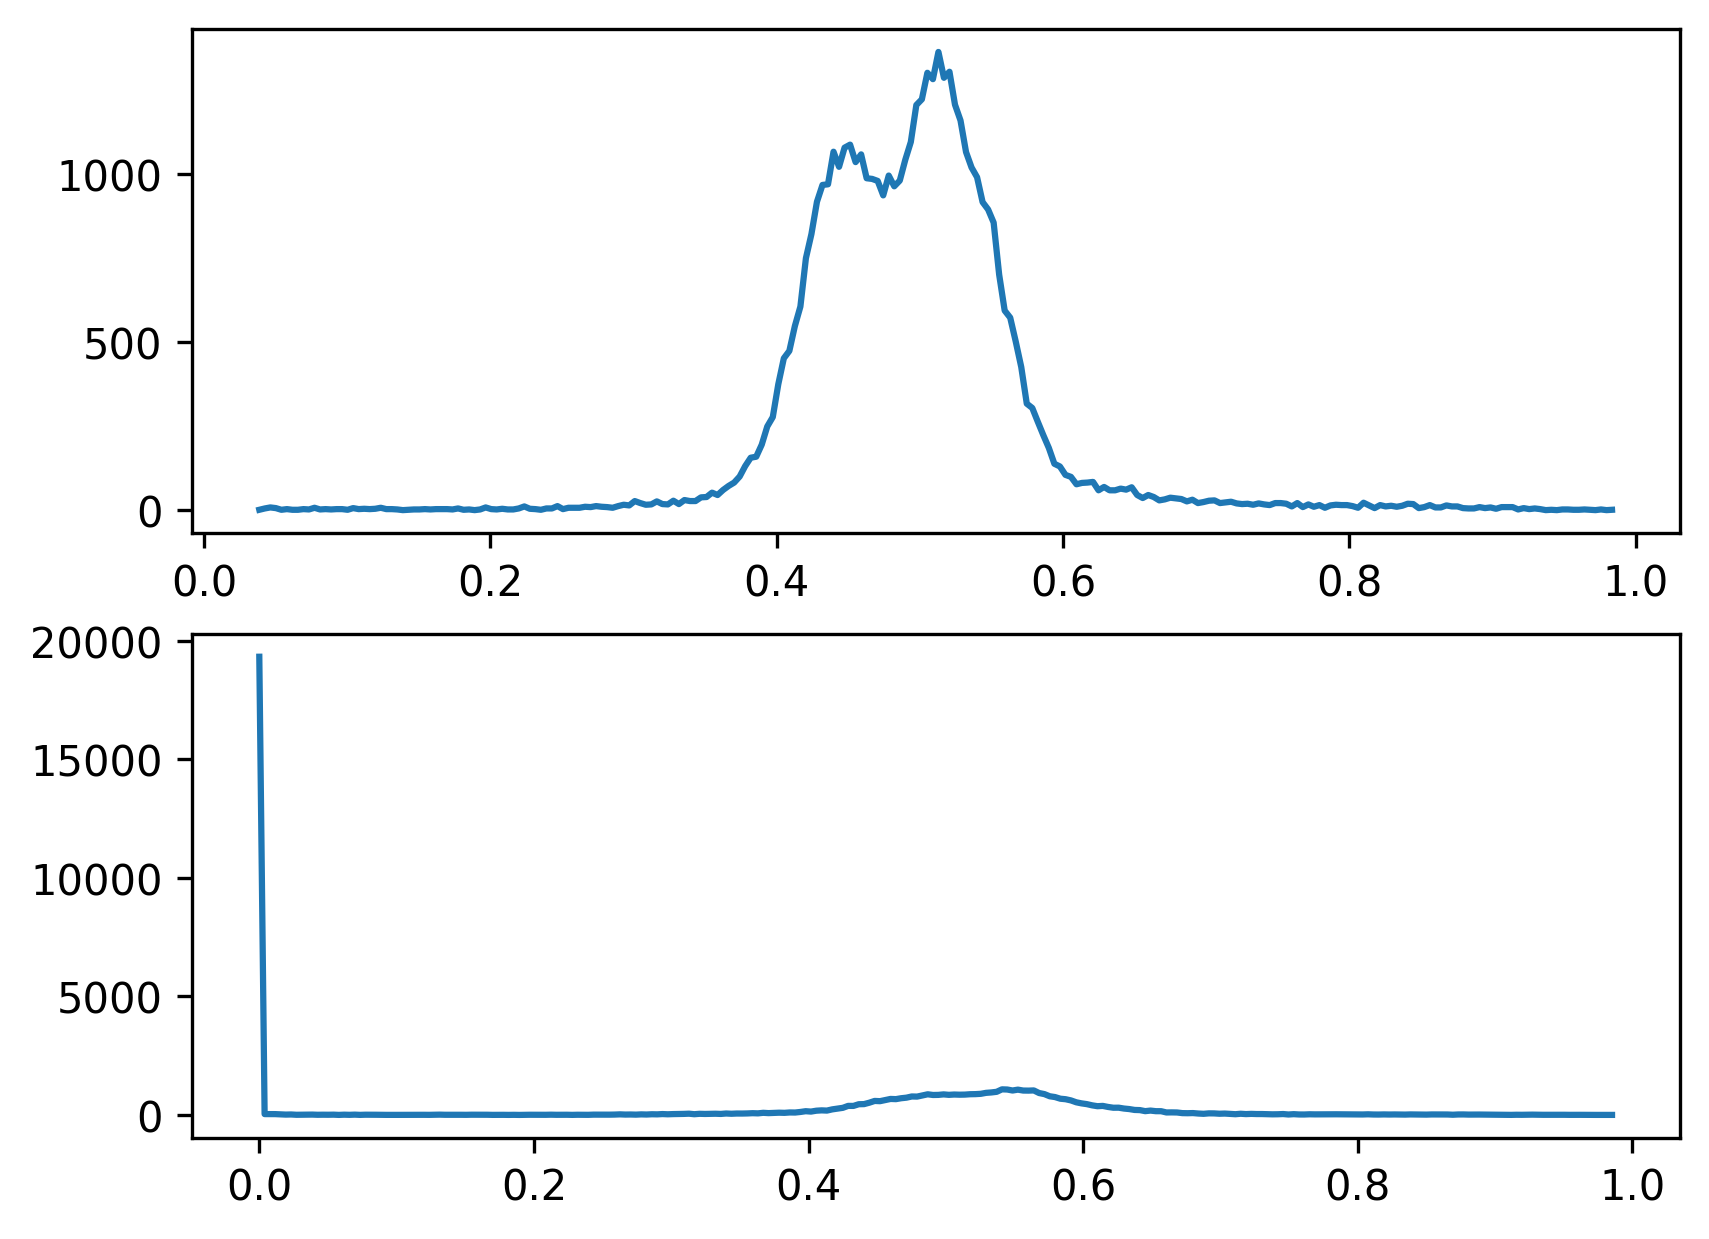

In [3]:
hist1 = np.histogram(image_homm, bins = 256)
hist2 = np.histogram(image_no_homm, bins = 256)

plt.figure(dpi = 300)

ax1 = plt.subplot(2, 1, 1)
ax1.plot(hist1[1][10:256], hist1[0][10:256])

ax2 = plt.subplot(2, 1, 2)
ax2.plot(hist2[1][0:256], hist2[0])





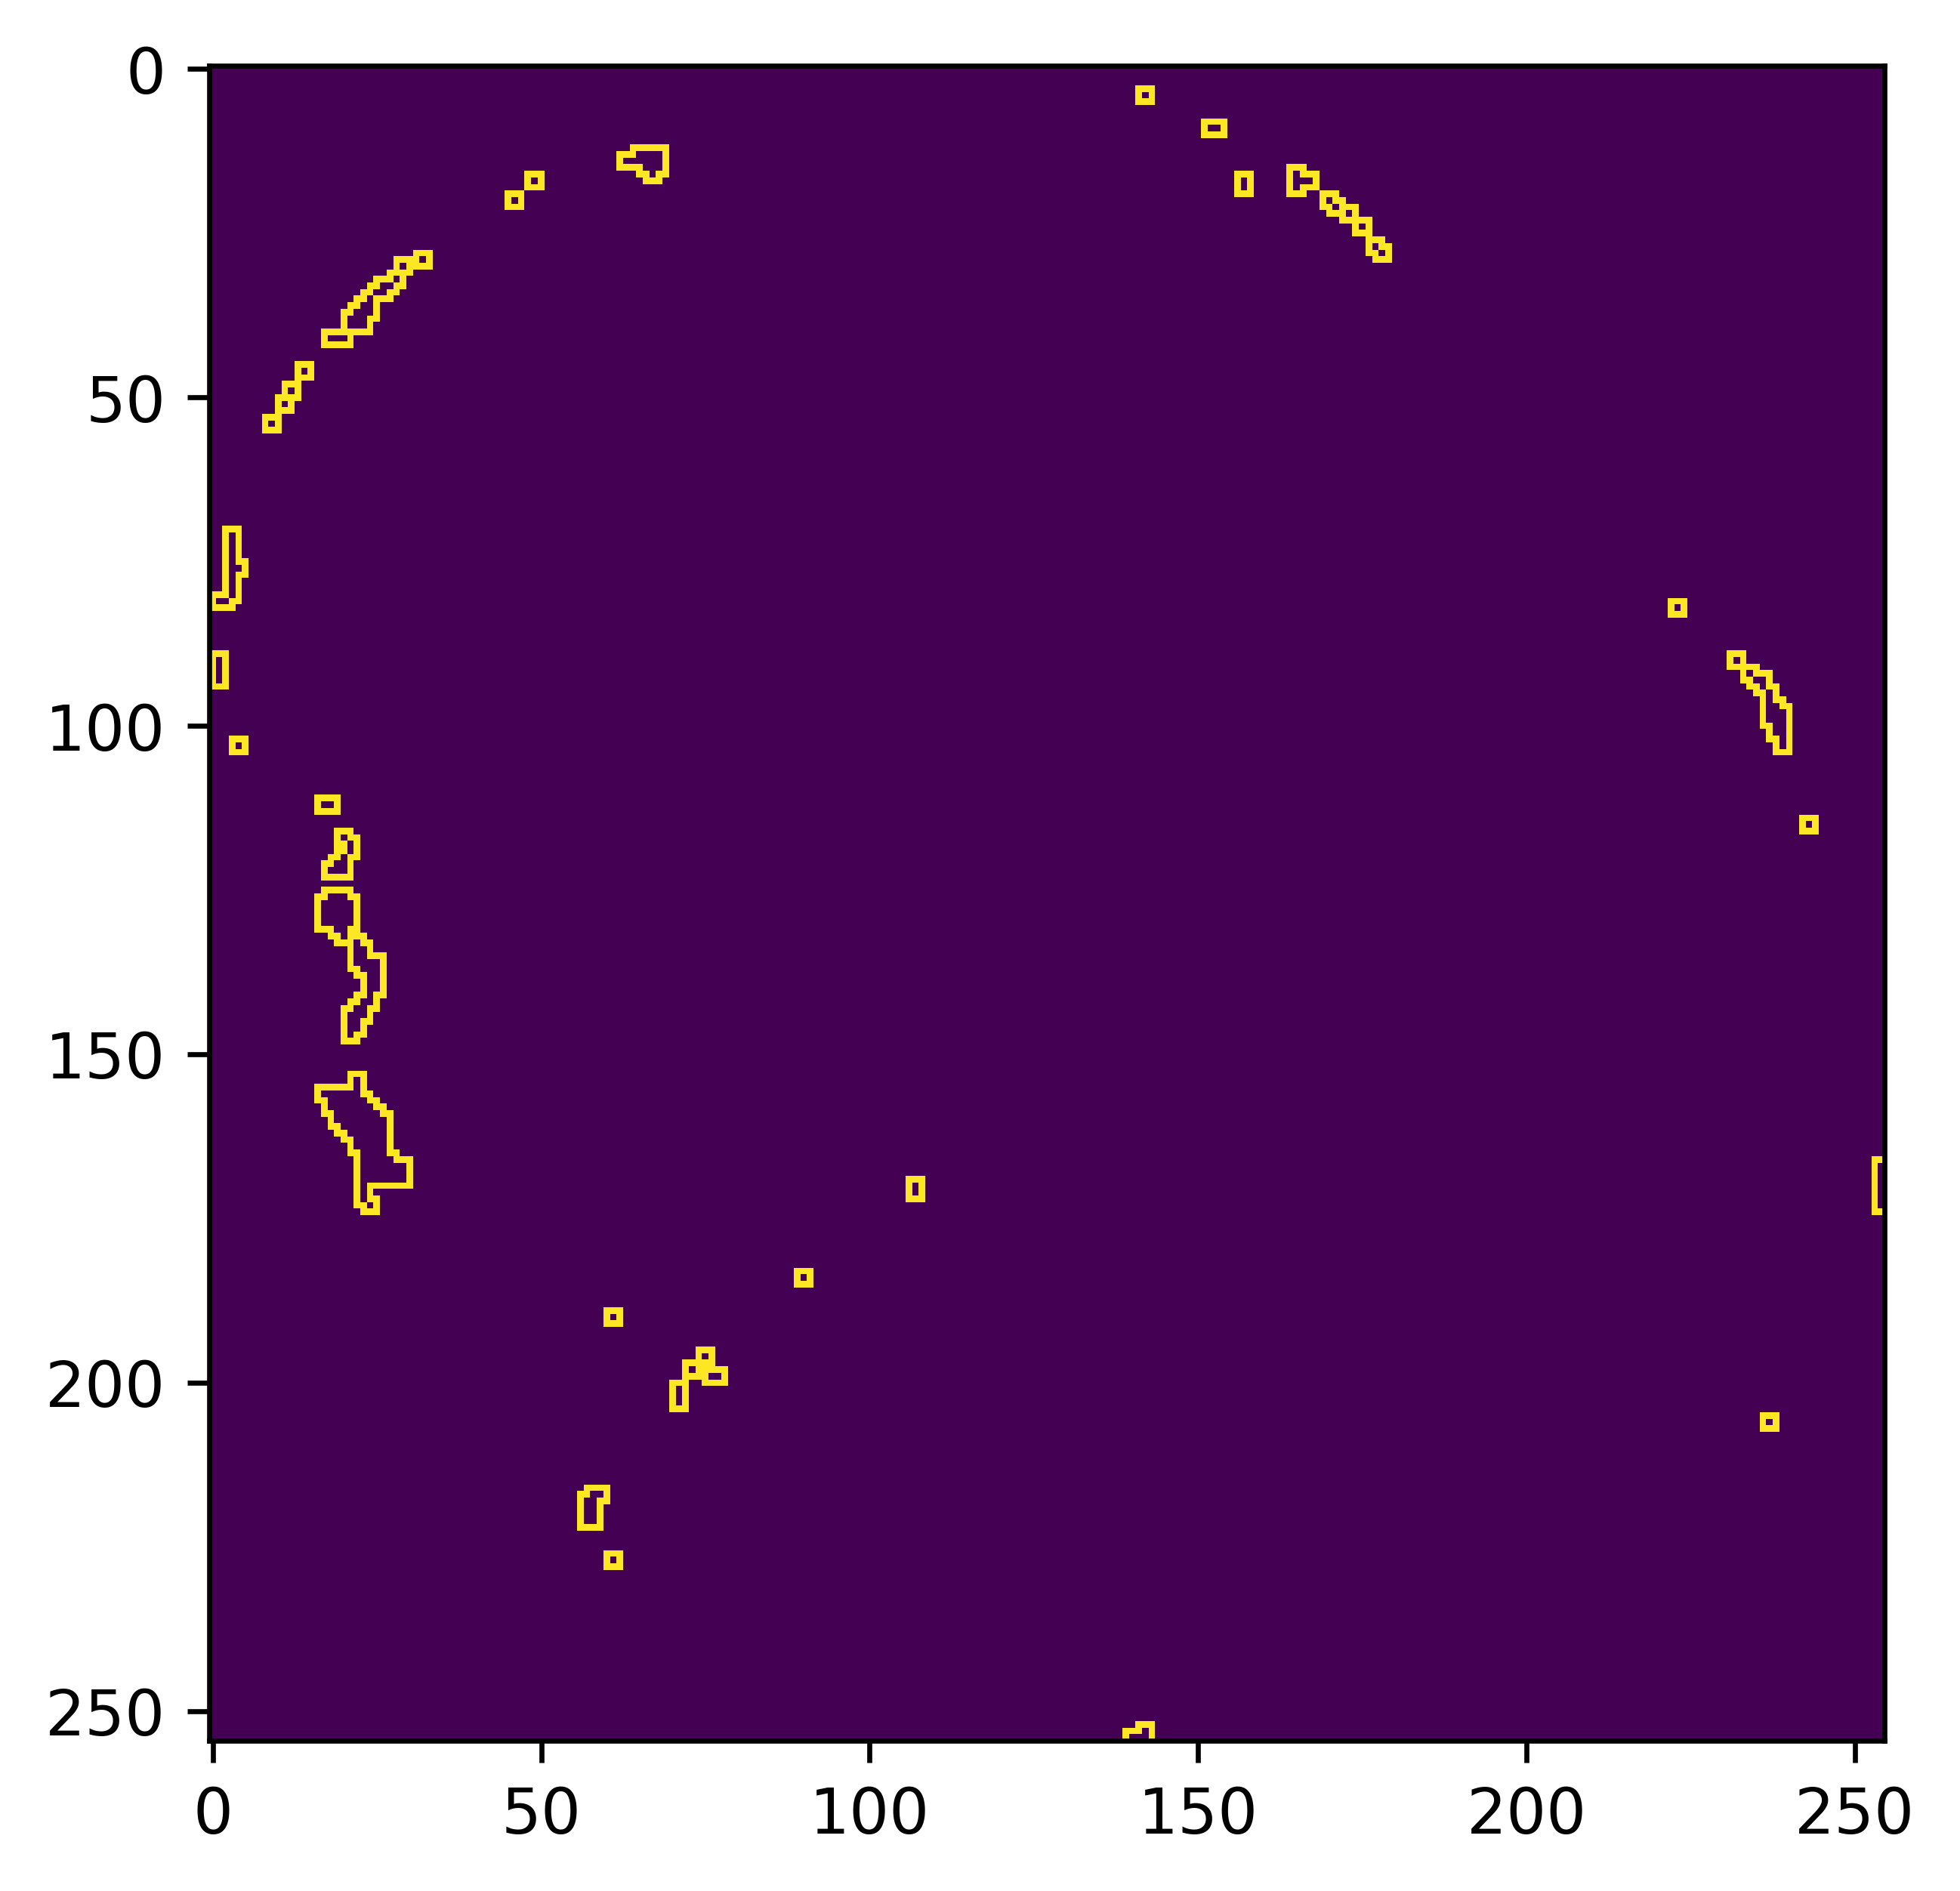

In [14]:
high = 1.0
low = 0
bins = 8
dx = (high-low)/bins

plt.figure(dpi = 600)

imgs = []

for i in range(bins):
    #ax = plt.subplot(4, 5, i+1)
    img = pre.binarize_jan(image_homm, low+(i+1)*dx, low+i*dx)
    #img = morphology.erosion(img, np.array([[0,1,0],[1,1,1],[0,1,0]]))
    img = morphology.erosion(img, np.ones((2, 2)))

    dil = morphology.dilation(img, np.ones((3, 3)))
    img = np.logical_xor(dil, img)
    imgs.append(img)
    #if i == 15:
        #plt.imsave("plik.bmp", img)
    
    
    #ax.imshow(img)

plt.imshow(imgs[5])

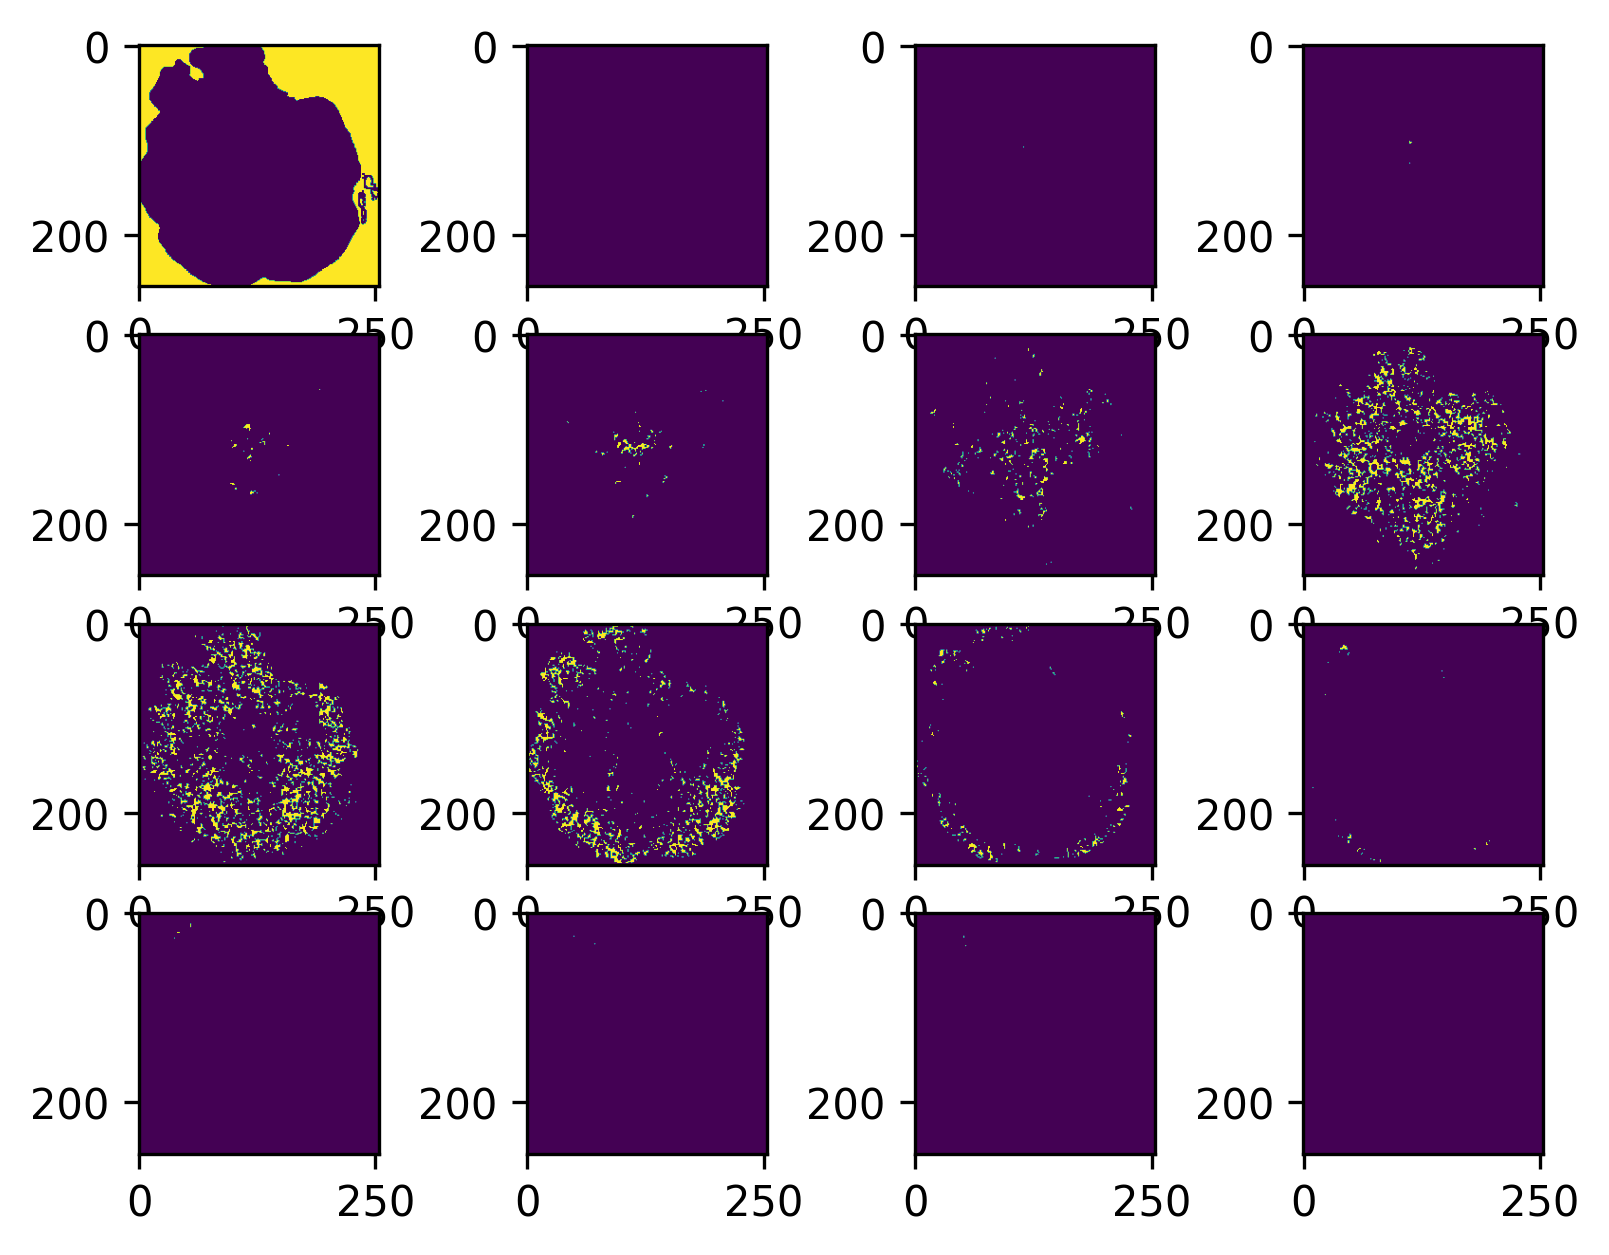

In [10]:
high = 1.0
low = 0.0
bins = 16
dx = (high-low)/bins

plt.figure(dpi = 300)
imgs = []
for i in range(bins):
    ax = plt.subplot(4, 4, i+1)
    img = pre.binarize_jan(image_no_homm, low+(i+1)*dx, low+i*dx)
    img = morphology.erosion(img, np.ones((2, 2)))

    #dil = morphology.dilation(img, np.ones((3, 3)))
    #img = np.logical_xor(dil, img)
    imgs.append(img)
    ax.imshow(img)


500
0
0
9
42
124
500
500
500
500
120
24
2
1
0
0


C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


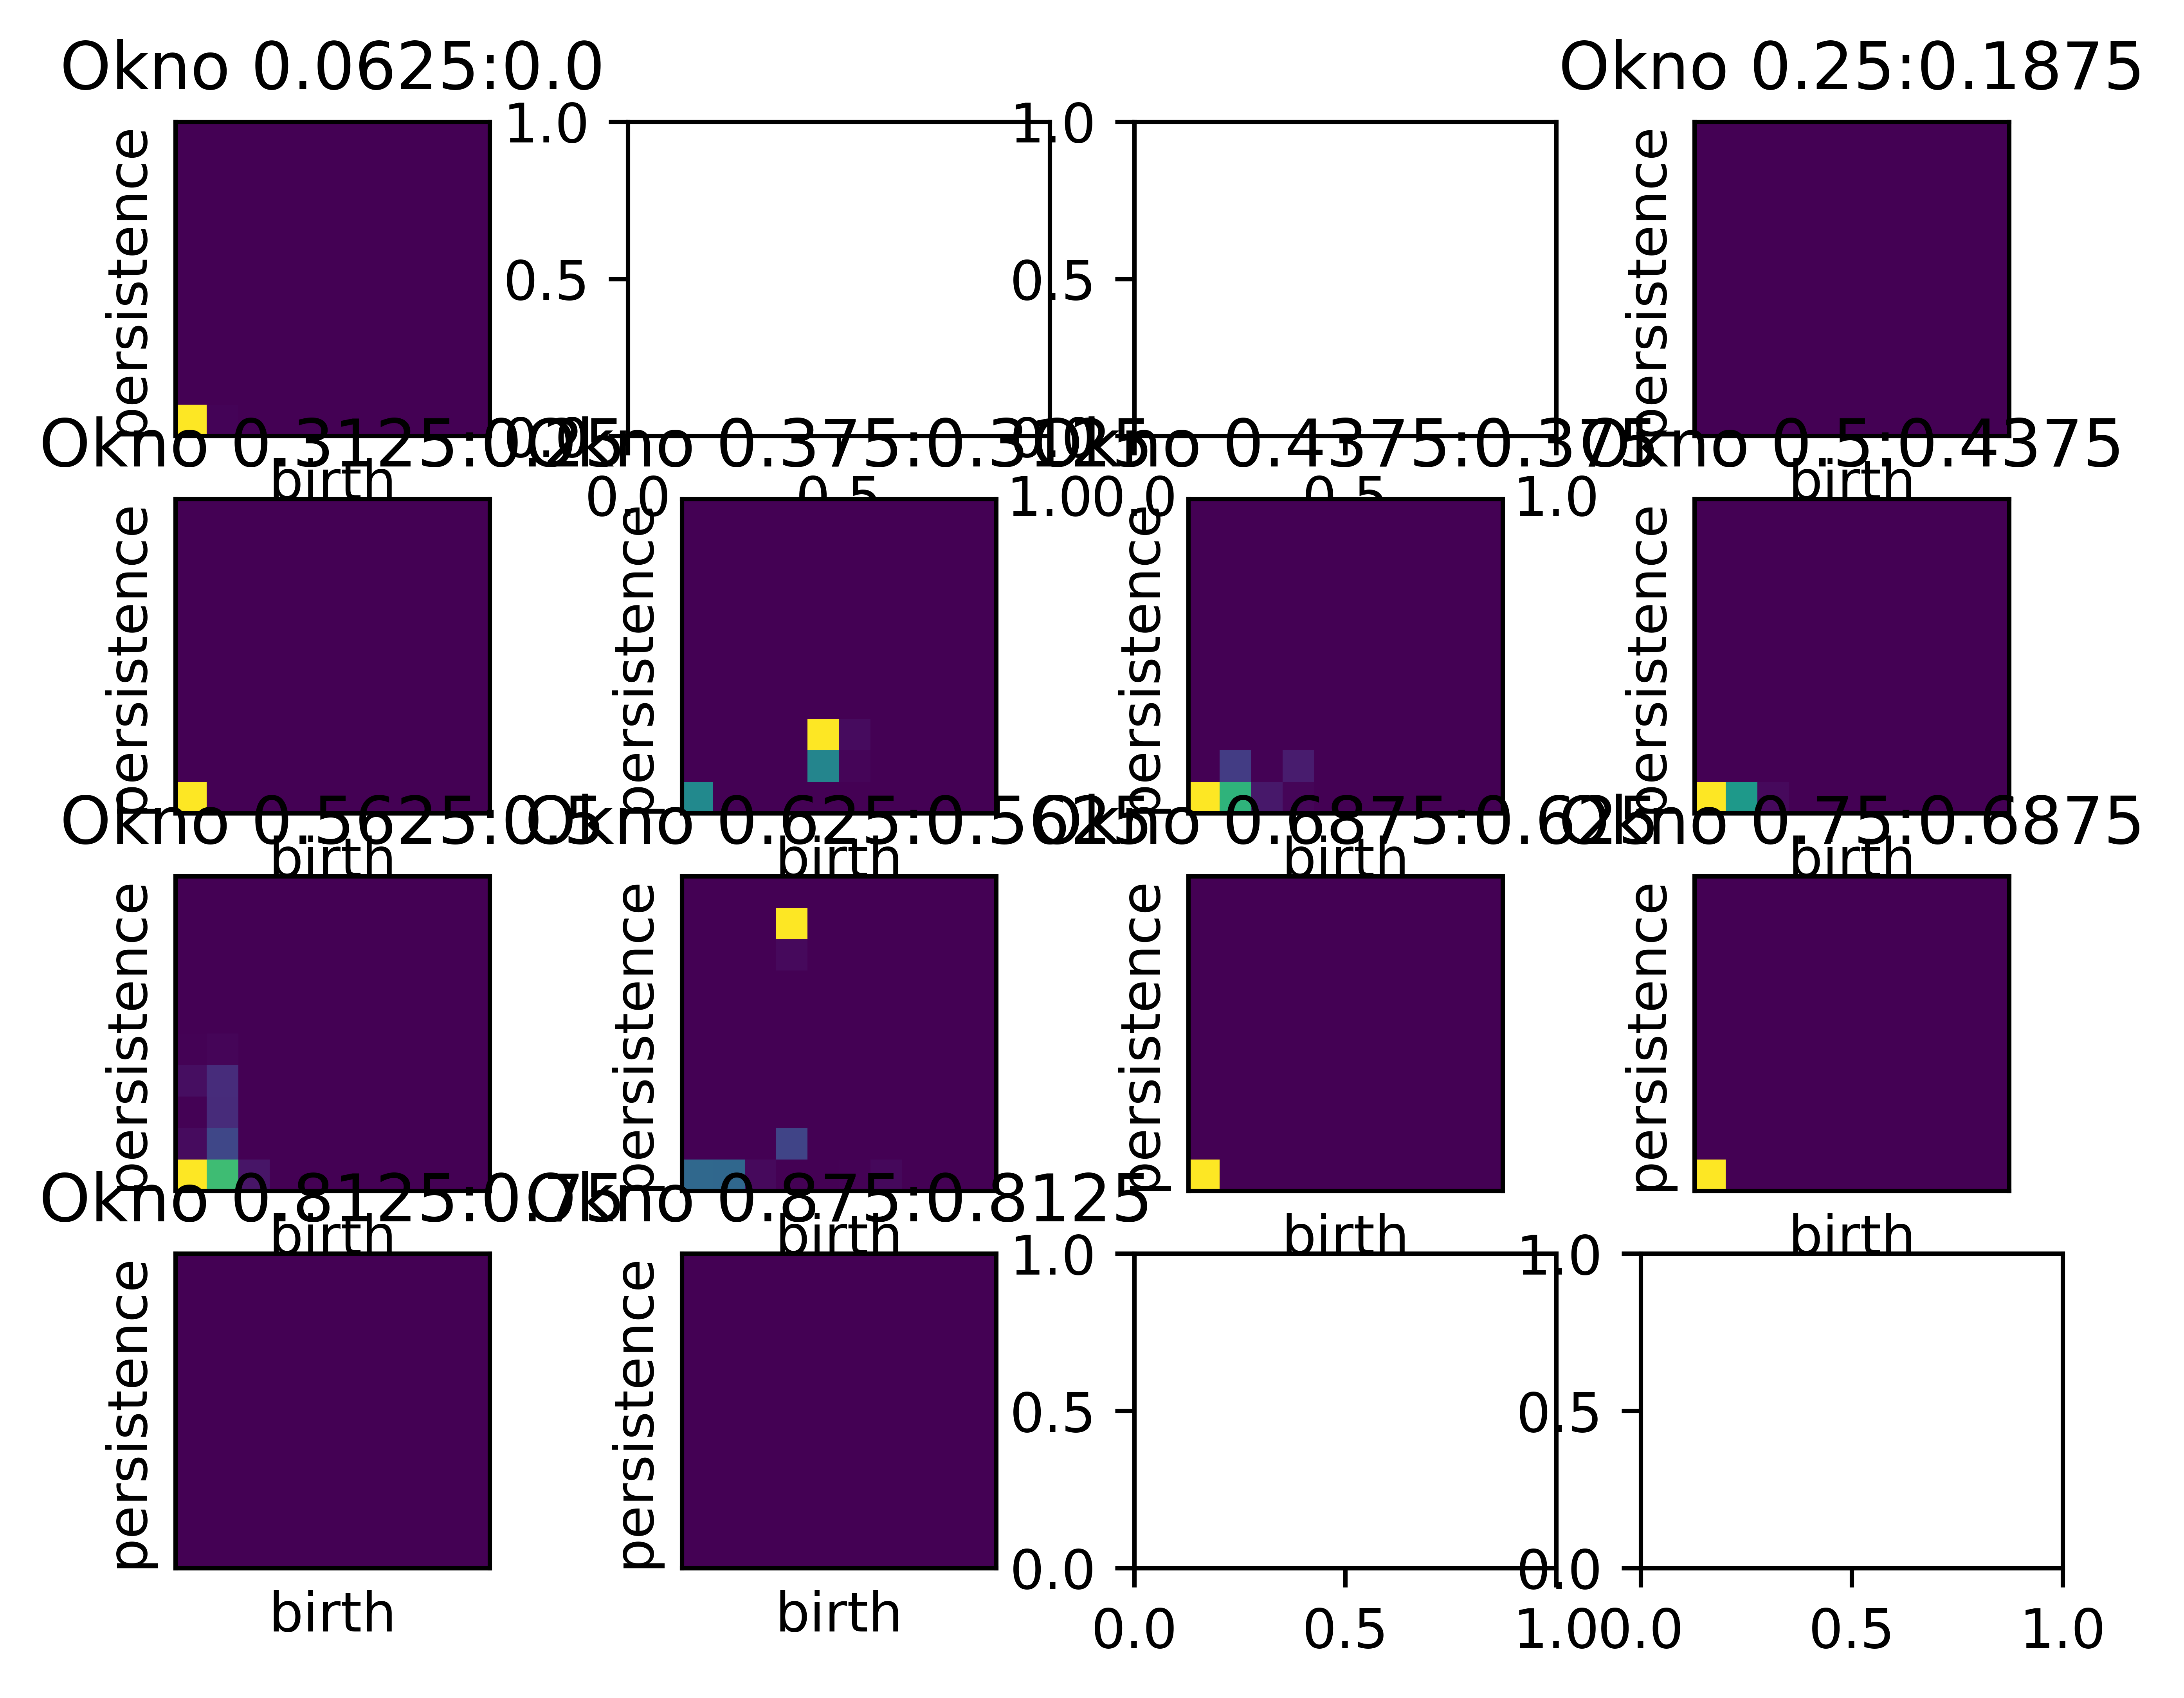

In [6]:
from persim import PersImage
from persim import PersistenceImager
from ripser import Rips
high = 1.0
low = 0.0
bins = 16
dx = (high-low)/bins

plt.figure(dpi = 1000)
dg = []
obrazy = []
for i in range(bins):
    ax = plt.subplot(4, 4, i+1)
    a, b = low+(i+1)*dx, low+i*dx
    img = pre.binarize_jan(image_homm, a, b)
    img = morphology.erosion(img, np.ones((2, 2)))

    #dil = morphology.dilation(img, np.ones((2, 2)))
    #img = np.logical_xor(dil, img)
    coords = np.nonzero(img)  
    coords = [(y,x) for y,x in zip(coords[0], coords[1]) ]
    coords = np.array(coords)

    num = min(500, coords.shape[0])
    print(num)
    if num != 0:
        res = ripser(coords, n_perm=num, thresh = 500.0)
        dgms_sub = res['dgms']
        dg.append(dgms_sub)
        pimgr = PersistenceImager(pixel_size=10, pers_range=(0.0, 100),birth_range=(0.0, 100))
        #pimgr.fit(dgms_sub[1])
        imgs = pimgr.transform(dgms_sub[1])
        pimgr.plot_image(imgs, ax)
        obrazy.append(imgs)
        
        ax.set_title("Okno "+str(a)+":"+str(b))  
    else:
        pass



In [7]:
for i in obrazy:
    print(i.max())

259.70972514266697
0.0
2.30231047092023
13.679099781267086
126.59765381185267
301.73512905130445
212.33466459969932
79.47951957982917
6.708631220445694
1.381386282552138
0.0
0.0


500
0
1
7
97
253
500


C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


500
500
500
500
86
10
2
5
0


C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


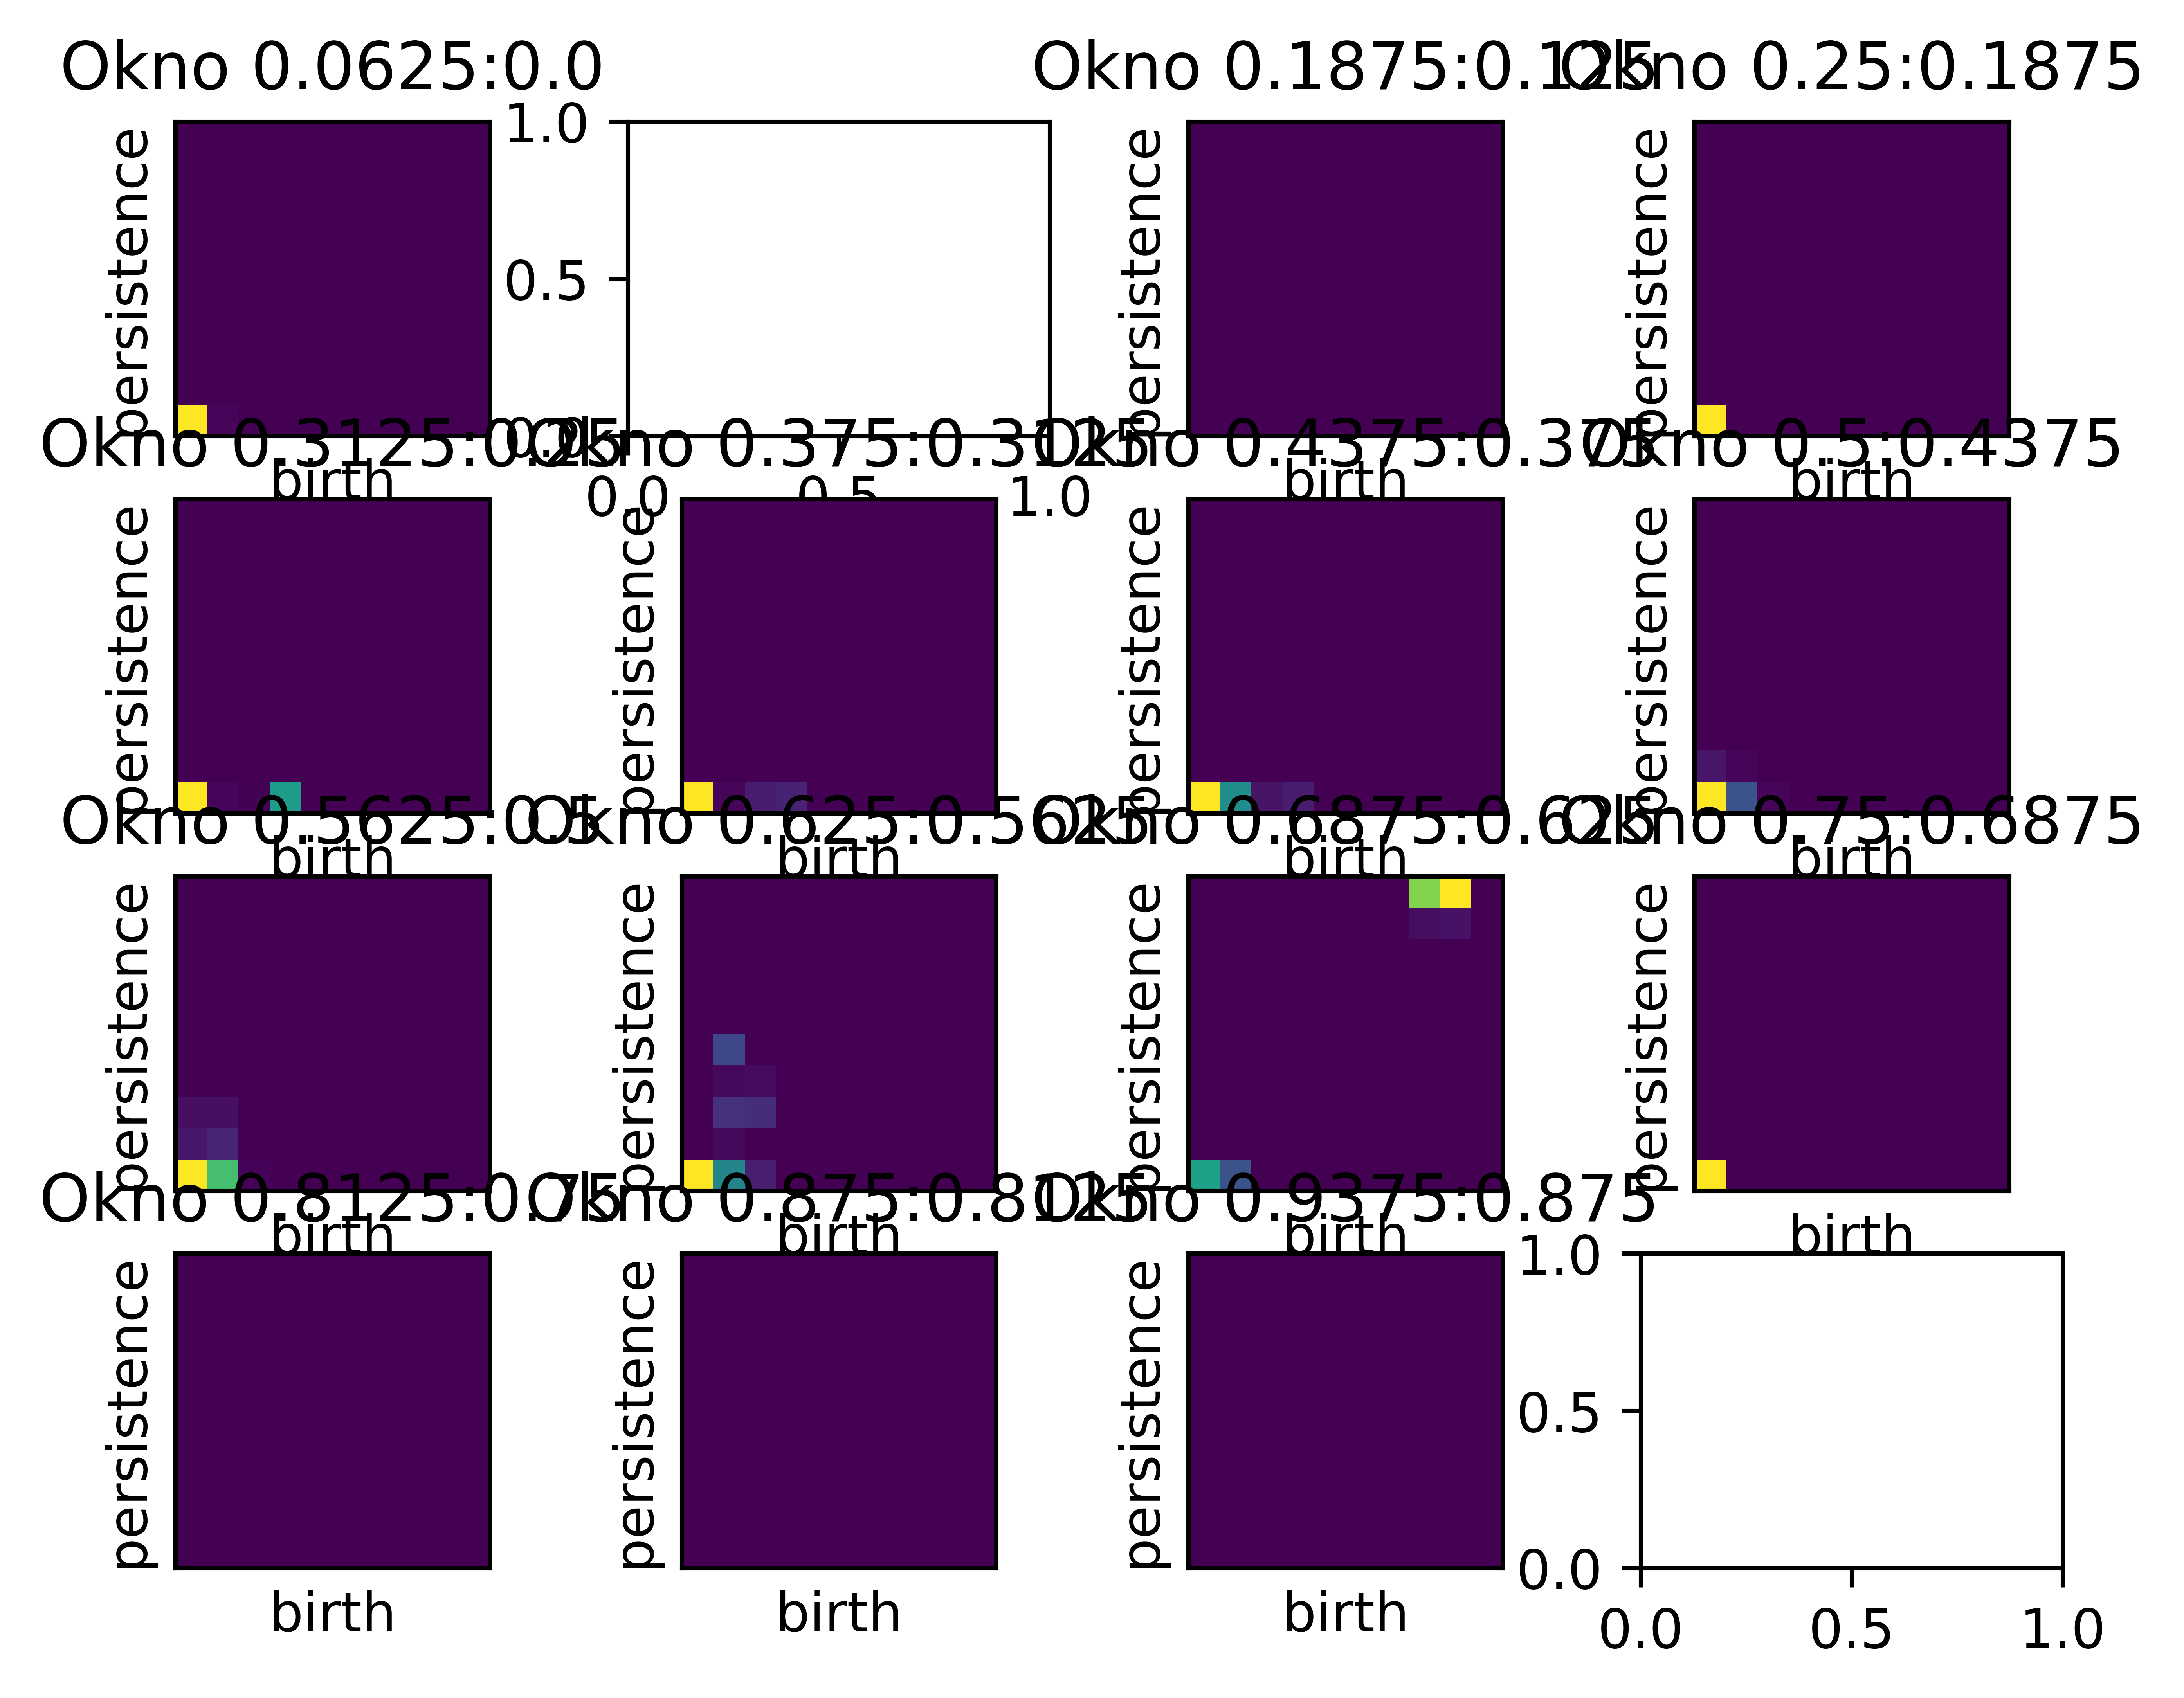

In [8]:
from persim import PersImage
from persim import PersistenceImager
from ripser import Rips
high = 1.0
low = 0.0
bins = 16
dx = (high-low)/bins

plt.figure(dpi = 1000)
dg = []
obrazy = []
for i in range(bins):
    ax = plt.subplot(4, 4, i+1)
    a, b = low+(i+1)*dx, low+i*dx
    img = pre.binarize_jan(image_no_homm, a, b)
    img = morphology.erosion(img, np.ones((2, 2)))

    #dil = morphology.dilation(img, np.ones((2, 2)))
    #img = np.logical_xor(dil, img)
    coords = np.nonzero(img)  
    coords = [(y,x) for y,x in zip(coords[0], coords[1]) ]
    coords = np.array(coords)

    num = min(500, coords.shape[0])
    print(num)
    if num != 0:
        res = ripser(coords, n_perm=num, thresh = 500.0)
        dgms_sub = res['dgms']
        dg.append(dgms_sub)
        pimgr = PersistenceImager(pixel_size=10, pers_range=(0.0, 100),birth_range=(0.0, 100))
        #pimgr.fit(dgms_sub[1])
        imgs = pimgr.transform(dgms_sub[1])
        pimgr.plot_image(imgs, ax)
        obrazy.append(imgs)
        
        ax.set_title("Okno "+str(a)+":"+str(b))  
    else:
        pass

In [9]:
for i in obrazy:
    print(i.max())

265.11328186797925
0.0
0.230231047092023
5.525578797600326
23.160065753128464
57.69471951174356
291.4171527735242
228.52247567108884
176.0024624207916
48.30040020696271
4.7161996516636275
0.0
0.0
0.0
